# <center>Natural Language Processing</center>

# YELP API

In [65]:
import requests 
import json
import re
from YelpAPI import apikey

<img src="api_key.PNG" width="550px">

<img src="api_key_1.PNG" width="550px">

<img src="path.PNG" width="550px">

In [66]:
headers = {'Authorization': 'Bearer %s' % apikey}

In [67]:
yelpurlsearch = 'https://api.yelp.com/v3/businesses/search'

In [68]:
params = {'term':'dosa','location':'Vancouver'}

In [69]:
# Making a get request to the API
req = requests.get(yelpurlsearch, params=params, headers=headers)

In [70]:
print('The status code is {}'.format(req.status_code))

The status code is 200


In [71]:
hotel_name = "Dosa Factory"
raw_data = req.json()
for data in raw_data['businesses']:
    if(data['name'] == hotel_name):
        hotel_id = data['id']

In [72]:
yelpurlreviews = f'https://api.yelp.com/v3/businesses/{hotel_id}/reviews'

In [73]:
# Making a get request to the API
reviews_req = requests.get(yelpurlreviews,headers=headers)

# proceed only if the status code is 200
print('The status code is {}'.format(reviews_req.status_code))

The status code is 200


In [74]:
reviews_data = reviews_req.json()

In [75]:
main_reviews = []
for reviews_data in reviews_data['reviews']:
    main_reviews.append(reviews_data['text'])

In [76]:
main_reviews

['Go before or after the lunch rush, especially on a Monday. Though they have lots of tables, it gets busy due to their Monday special of ANY dosa for $6.95...',
 'Best CURRIES comes with naan or rice.\nTasty Biryani with choice of chicken,goat lamb\nLovely service\nAlways busy\nAll in all BEST.',
 'I heard so many rave reviews about Dosa Factory, I FINALLY got a chance to try it out. I was NOT disappointed!! in fact ... I will definitely be going back...']

In [77]:
## https://www.yelp.ca/biz/dosa-factory-vancouver-2

# NLP

<img src="pipelining.png">

In [78]:
import spacy

In [79]:
nlp = spacy.load("en")

In [80]:
data = nlp(main_reviews[0])

# Sentence Segmentation

In [81]:
for sentence in data.sents:
    print(sentence)

Go before or after the lunch rush, especially on a Monday.
Though they have lots of tables, it gets busy due to their Monday special of ANY dosa for $6.95...


## Tokenization

In [82]:
tokens = [token.text for token in data]
tokens

['Go',
 'before',
 'or',
 'after',
 'the',
 'lunch',
 'rush',
 ',',
 'especially',
 'on',
 'a',
 'Monday',
 '.',
 'Though',
 'they',
 'have',
 'lots',
 'of',
 'tables',
 ',',
 'it',
 'gets',
 'busy',
 'due',
 'to',
 'their',
 'Monday',
 'special',
 'of',
 'ANY',
 'dosa',
 'for',
 '$',
 '6.95',
 '...']

## Parts Of Speech

In [83]:
for tokens in data:
    print(tokens.text,"\t\t",tokens.pos_,"\t\t",spacy.explain(tokens.pos_))

Go 		 VERB 		 verb
before 		 ADV 		 adverb
or 		 CCONJ 		 coordinating conjunction
after 		 ADP 		 adposition
the 		 DET 		 determiner
lunch 		 NOUN 		 noun
rush 		 NOUN 		 noun
, 		 PUNCT 		 punctuation
especially 		 ADV 		 adverb
on 		 ADP 		 adposition
a 		 DET 		 determiner
Monday 		 PROPN 		 proper noun
. 		 PUNCT 		 punctuation
Though 		 ADP 		 adposition
they 		 PRON 		 pronoun
have 		 VERB 		 verb
lots 		 NOUN 		 noun
of 		 ADP 		 adposition
tables 		 NOUN 		 noun
, 		 PUNCT 		 punctuation
it 		 PRON 		 pronoun
gets 		 VERB 		 verb
busy 		 ADJ 		 adjective
due 		 ADP 		 adposition
to 		 ADP 		 adposition
their 		 DET 		 determiner
Monday 		 PROPN 		 proper noun
special 		 ADJ 		 adjective
of 		 ADP 		 adposition
ANY 		 DET 		 determiner
dosa 		 NOUN 		 noun
for 		 ADP 		 adposition
$ 		 SYM 		 symbol
6.95 		 NUM 		 numeral
... 		 PUNCT 		 punctuation


## Lemmatization

In [84]:
for tokens in data:
    print(tokens.text,"\t\t",tokens.lemma,"\t\t",tokens.lemma_)

Go 		 8004577259940138793 		 go
before 		 11320251846592927908 		 before
or 		 3740602843040177340 		 or
after 		 13428508259213873547 		 after
the 		 7425985699627899538 		 the
lunch 		 7857862308360435530 		 lunch
rush 		 3767281279084406306 		 rush
, 		 2593208677638477497 		 ,
especially 		 13751905263548122051 		 especially
on 		 5640369432778651323 		 on
a 		 11901859001352538922 		 a
Monday 		 5380955630302557368 		 Monday
. 		 12646065887601541794 		 .
Though 		 16680099953739830072 		 though
they 		 561228191312463089 		 -PRON-
have 		 14692702688101715474 		 have
lots 		 6920515201346452032 		 lot
of 		 886050111519832510 		 of
tables 		 10911622026469197494 		 table
, 		 2593208677638477497 		 ,
it 		 561228191312463089 		 -PRON-
gets 		 2013399242189103424 		 get
busy 		 14772814303409127848 		 busy
due 		 3766551886407196655 		 due
to 		 3791531372978436496 		 to
their 		 561228191312463089 		 -PRON-
Monday 		 5380955630302557368 		 Monday
special 		 3341329822471248993 		

## Visualizing the entity recognizer

In [85]:
from spacy import displacy
displacy.render(data, style='dep', jupyter=True, options={'distance': 110})

In [86]:
from spacy import displacy
displacy.render(data, style='ent', jupyter=True, options={'distance': 110})

## Cleaning the data

In [87]:
main_reviews[0] = re.sub(r'[^\w\s]','',main_reviews[0])
data = nlp(main_reviews[0])
data

Go before or after the lunch rush especially on a Monday Though they have lots of tables it gets busy due to their Monday special of ANY dosa for 695

## Identifying Stop Words

In [88]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'had', 'without', 'itself', 'give', 'sometime', 'over', 'eight', 'only', 'you', 'among', 'using', 'all', 'several', 'make', 'enough', 'six', 'across', 'every', 'hence', 'otherwise', 'call', 'will', 'our', 'then', 'during', 'can', 'anywhere', 'my', 'against', 'up', 'twelve', 'not', 'something', 'or', 'either', 'most', 'been', 'so', 'above', 're', 'other', '‘re', 'an', 'bottom', 'which', 'unless', 'was', 'around', 'yourself', 'thence', 'beside', 'could', 'its', 'thereupon', 'the', 'nothing', 'two', 'he', '‘d', 'it', "'m", 'already', 'very', 'except', "'ve", 'of', 'myself', 'please', 'mine', 'just', 'via', 'meanwhile', 'has', 'some', 'former', 'ours', 'are', 'since', 'see', 'their', 'forty', 'whole', 'himself', '’re', 'n’t', 'namely', 'somehow', 'nobody', 'once', 'keep', 'being', 'few', 'your', 'mostly', 'whatever', 'go', 'thereafter', 'these', 'hereby', 'she', 'therefore', "'re", 'get', 'say', 'below', 'yourselves', 'per', 'how', 'further', 'herein', 'much', 'again', 'beyond', 'a', 'sam

In [89]:
len(nlp.Defaults.stop_words)

325

In [90]:
data

Go before or after the lunch rush especially on a Monday Though they have lots of tables it gets busy due to their Monday special of ANY dosa for 695

In [91]:
tokens = [token.text for token in data if not token.is_stop]
print(f'Original Article:{data}]')
print()
print(tokens)

Original Article:Go before or after the lunch rush especially on a Monday Though they have lots of tables it gets busy due to their Monday special of ANY dosa for 695]

['lunch', 'rush', 'especially', 'Monday', 'lots', 'tables', 'gets', 'busy', 'Monday', 'special', 'dosa', '695']


## Add a stop word

In [92]:
nlp.Defaults.stop_words.add('especially')

In [93]:
nlp.vocab['especially'].is_stop = True

In [94]:
len(nlp.Defaults.stop_words)

326

In [95]:
nlp.vocab['especially'].is_stop

True

## Remove a stop word

In [96]:
nlp.vocab['especially'].is_stop

True

In [97]:
len(nlp.Defaults.stop_words)

326

In [98]:
nlp.Defaults.stop_words.remove('especially')

In [99]:
nlp.vocab['between'].is_stop = False

In [100]:
nlp.vocab['between'].is_stop

False

In [101]:
len(nlp.Defaults.stop_words)

325

# Wordcloud

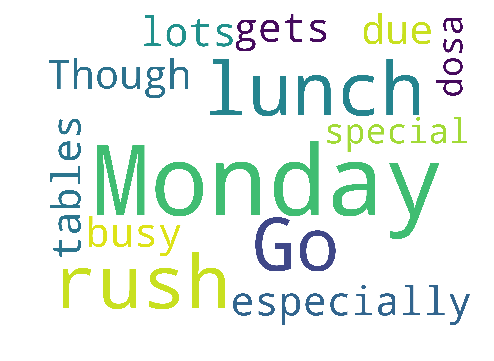

In [102]:
import matplotlib.pyplot as plt
#import WordCloud,STOPWORDS from wordcloud
from wordcloud import WordCloud, STOPWORDS

#Setting stopwards in a variable
stopwords = set(STOPWORDS)  

#creating function show_wordcloud
def show_wordcloud(insertdata):
    wordcloud = WordCloud(width = 400,
                          height=300,
        background_color='white',
        stopwords=stopwords,
        max_font_size=90, 
        scale=10,
    ).generate(str(insertdata))

    fig = plt.figure(1, figsize=(12, 6))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(data)